Para poder solucionar los ejercicios de hoy no solo tendremos que visualizar, también tendremos que usar métodos que hemos aprendido en lecciones anteriores de Pandas como por ejemplo value_counts(), isnull, describe, etc.
Tendréis que realizar gráficas para contestar a las siguientes preguntas:

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
df = pd.read_csv('ataques.csv')

1. ¿Cuál es la frecuencia de cada una de las categorías de la columna sex?

In [8]:
df.head(2)


,Unnamed: 0,unnamed:_0,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,href,case_number.2
0,0,0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25
1,1,1,2018.06.18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18


In [14]:
frecuencia= df['sex_'].value_counts()
frecuencia

M      4939
F       619
M         2
N         2
lli       1
.         1
Name: sex_, dtype: int64

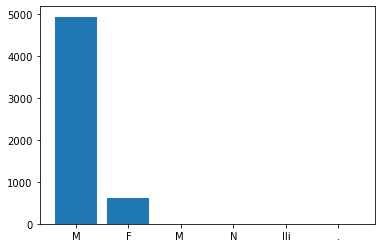

In [16]:
x = frecuencia.index
y = frecuencia
plt.figure
plt.bar(x,y)
plt.show()

2. ¿Cuál es el porcentaje de nulos por columna? Usa un pie chart donde incluyáis el porcentaje de cada variable en el interior del quesito. Para eso tendréis que usar el parámetro autopct, aquí algo de documentación.

In [7]:
df.columns

Index(['Unnamed: 0', 'unnamed:_0', 'case_number', 'year', 'type', 'country',
       'area', 'location', 'activity', 'name', 'sex_', 'age', 'time',
       'species_', 'href', 'case_number.2'],
      dtype='object')

In [20]:
df.isnull().sum()

Unnamed: 0          0
unnamed:_0          0
case_number         1
year                0
type                4
country            40
area              408
location          488
activity          511
name              200
sex_              550
age              2666
time             3180
species_         2705
href                0
case_number.2       0
dtype: int64

In [57]:
columnas=df.columns
porcentajes=[]
for i in df.columns:
  #columnas.append(i)
  porcentajes1 = (df[i].isnull().sum()/df.shape[0])*100
  porcentajes.append(porcentajes1)
diccionario = dict (zip(columnas, porcentajes))
print (diccionario)


{'Unnamed: 0': 0.0, 'unnamed:_0': 0.0, 'case_number': 0.01635590448151783, 'year': 0.0, 'type': 0.06542361792607132, 'country': 0.6542361792607131, 'area': 6.673209028459273, 'location': 7.981681386980701, 'activity': 8.35786719005561, 'name': 3.2711808963035653, 'sex_': 8.995747464834805, 'age': 43.604841347726534, 'time': 52.01177625122669, 'species_': 44.24272162250573, 'href': 0.0, 'case_number.2': 0.0}


In [65]:
cuadro= pd.Series(diccionario)
cuadro
#le paso una lista de index porque de otra forma de ma error y me dice que la necesito

Unnamed: 0        0.000000
unnamed:_0        0.000000
case_number       0.016356
year              0.000000
type              0.065424
country           0.654236
area              6.673209
location          7.981681
activity          8.357867
name              3.271181
sex_              8.995747
age              43.604841
time             52.011776
species_         44.242722
href              0.000000
case_number.2     0.000000
dtype: float64

In [25]:
cuadro.index

Index(['Unnamed: 0', 'unnamed:_0', 'case_number', 'year', 'type', 'country',
       'area', 'location', 'activity', 'name', 'sex_', 'age', 'time',
       'species_', 'href', 'case_number.2'],
      dtype='object')

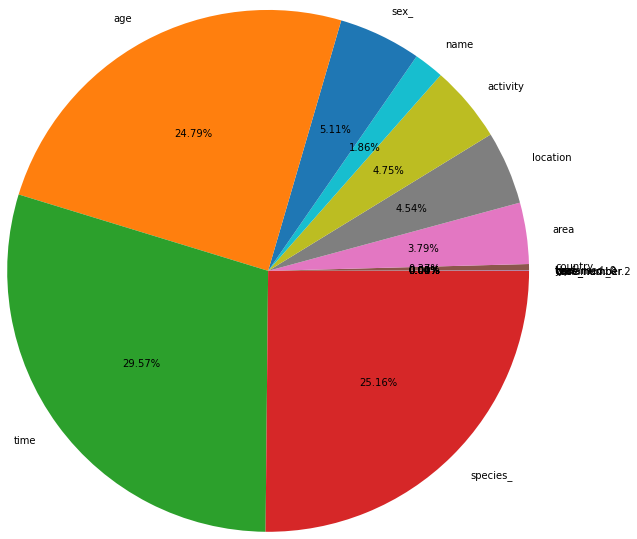

In [83]:
plt.figure(figsize=(4, 4))
plt.pie (cuadro, labels=cuadro.index, radius=3, autopct='%1.2f%%')
plt.show()

3. ¿Cuál es el número total de valores únicos de cada una de las columnas categóricas del DataFrame?


In [86]:
df2=df.describe(include=object) 
df3=df2.head(2).T
df3

#con el metodo describ nos saca el unique incluyendo las categoricas y lo almacenamos en un DF para poder visualizarlo

,count,unique
case_number,6113,6113
type,6110,8
country,6074,201
area,5706,791
location,5626,4020
activity,5603,1484
name,5914,5118
sex_,5564,6
age,3448,156
time,2934,366


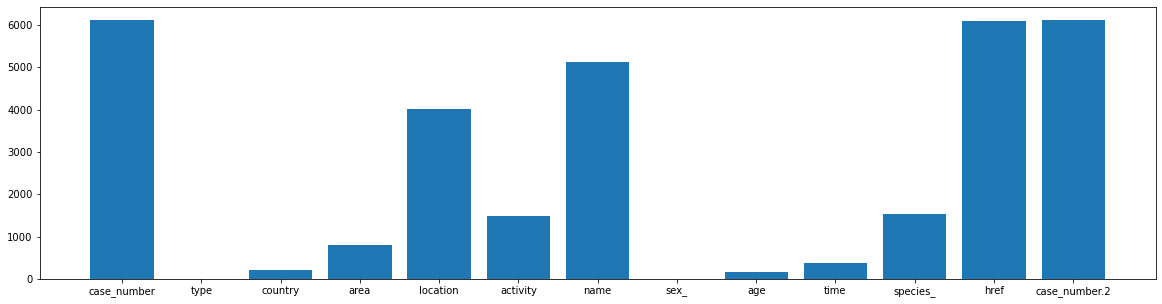

In [91]:
x = df3.index
y = df3['unique']
plt.figure (figsize=(20, 5))
plt.bar(x,y)
plt.show()

4. Filtrad los datos para quedarnos solo con los datos de USA.
 - Cuántos ataques de tiburones hubo en USA a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.


In [103]:
df_usa_2000= df[(df['country']=='USA') & (df['year']>2000)]
df_usa_2000.shape
#959 ataques

(959, 16)

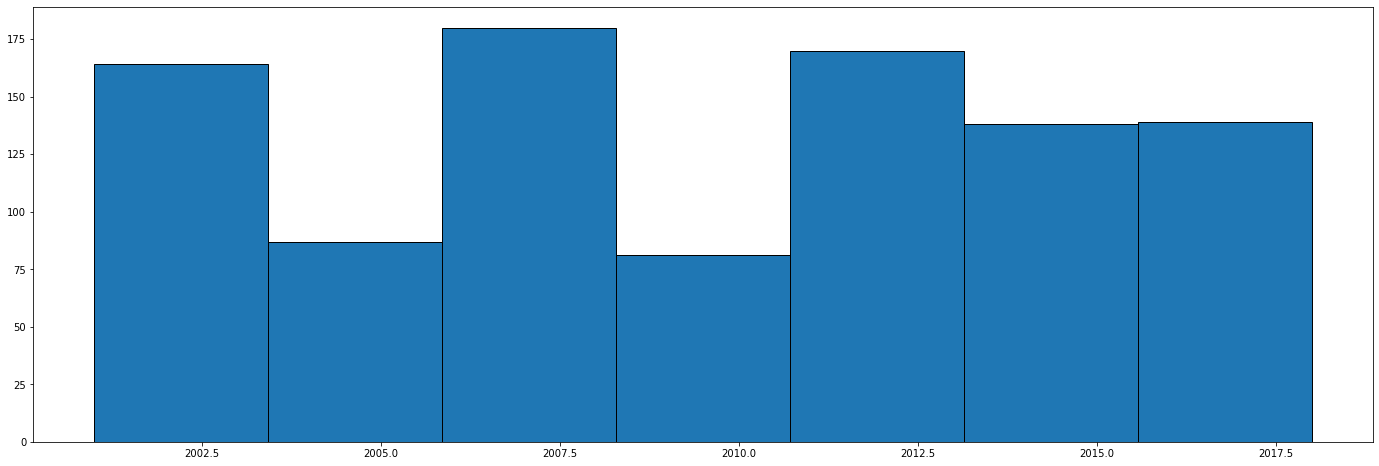

In [111]:
plt.figure (figsize=(24,8))
plt.hist (x = df_usa_2000 ['year'], edgecolor = "black", bins = 7)
plt.show()

 - En función del tipo, ¿cuántos ataques de tiburones de cada tipo hubo en USA? Muestra los resultados en un gráfico de línea.

In [131]:
df_usa_2000.head(2)

,Unnamed: 0,unnamed:_0,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,href,case_number.2
0,0,0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25
1,1,1,2018.06.18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18


In [151]:
df_tipo= df_usa_2000['type'].value_counts()
df_tipo

Unprovoked      797
Invalid          65
Provoked         60
Boating          32
Boat              3
Sea Disaster      2
Name: type, dtype: int64

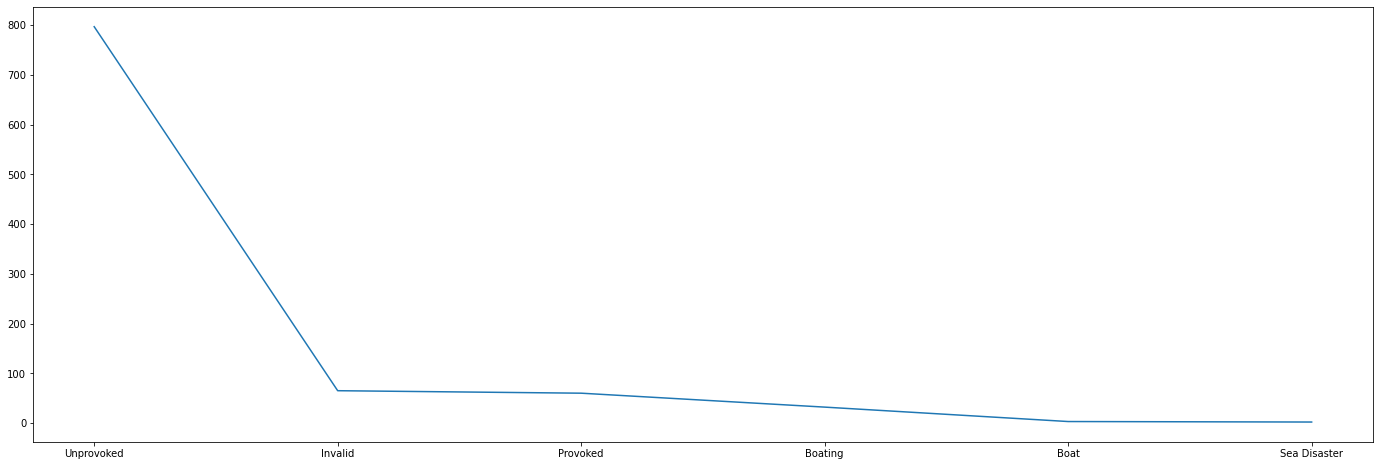

In [150]:
#plot no esta en los apuntes contrastar por si acaso
x=df_tipo.index
y=df_tipo
plt.figure (figsize=(24,8))
plt.plot (x,y )
plt.show()

5. Filtrad los datos para Spain:
 - ¿Cuántos ataques de tiburones hubo en España a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.


In [154]:
df_spain= df[(df['country']=='SPAIN') & (df["year"] >2000)]
df_spain.head(1)

,Unnamed: 0,unnamed:_0,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,href,case_number.2
82,82,82,2017.09.16.b,2017.0,Unprovoked,SPAIN,Canary Islands,Gran Canaria,Body surfing,male,M,13,NaN,"Porbeagle, 1.5 m",http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.16.b


In [155]:
x= df_spain['year']

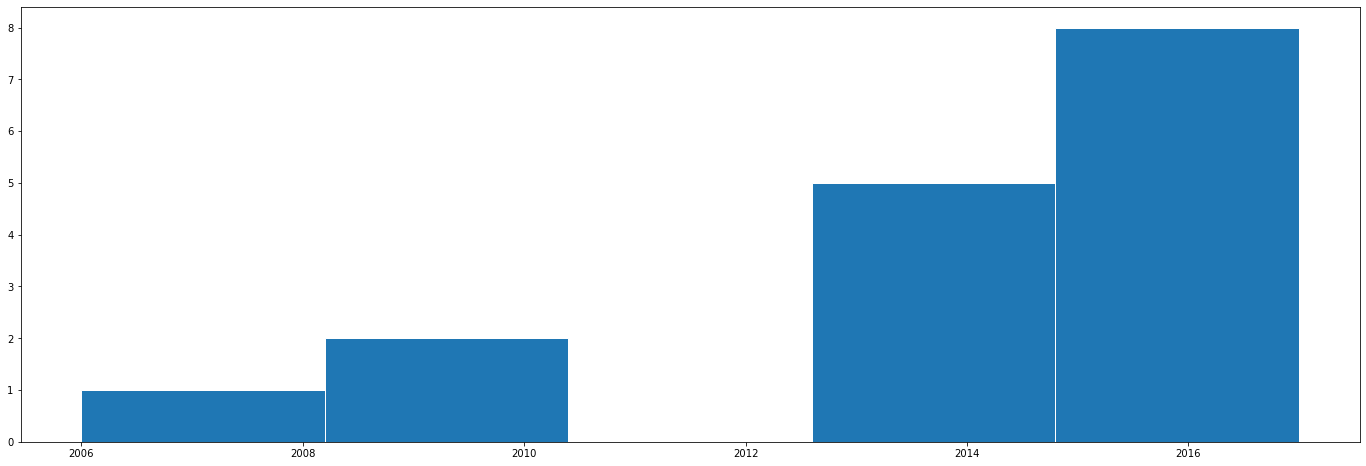

In [159]:
plt.figure (figsize=(24,8))
plt.hist (x, bins=5, edgecolor='white')
plt.show()

 - En función del tipo, ¿cuántos ataques de cada tipo de tiburones hubo en España? Muestra los resultados en un gráfico de línea.

In [173]:
df_tipo_spain = pd.Series(df_spain['type'].value_counts())

In [174]:
df_tipo_spain

Unprovoked    9
Invalid       5
Provoked      2
Name: type, dtype: int64

In [177]:
x1= df_tipo_spain.index
y1=df_tipo_spain

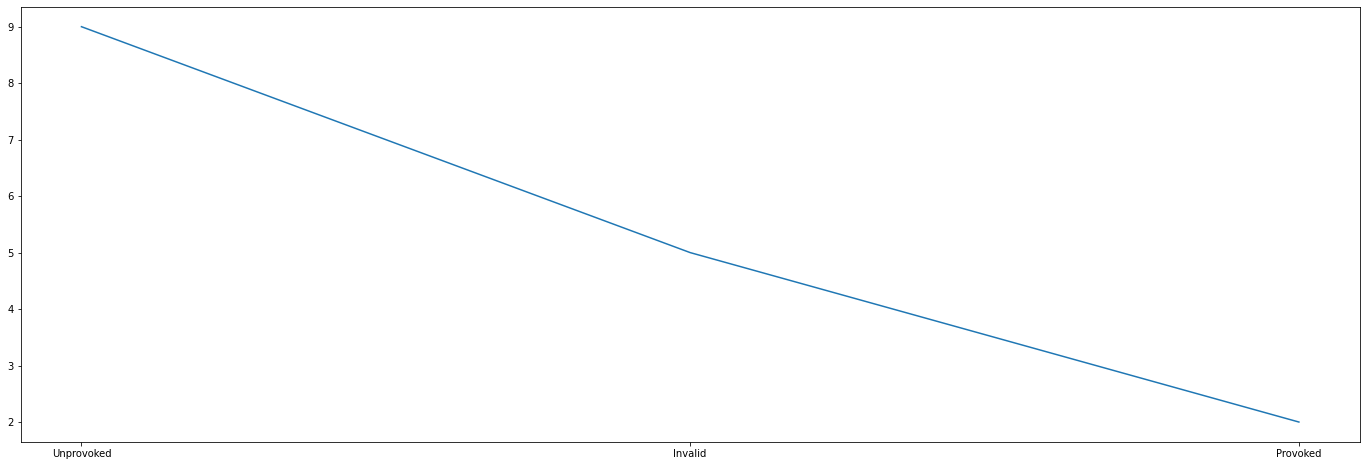

In [178]:

plt.figure (figsize=(24,8))
plt.plot (x1,y1)
plt.show()